In [2]:
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patheffects import Stroke, Normal
import numpy as np
import toml
from datetime import datetime
import pandas as pd
import re
from typing import Union
import os

In [3]:
URL_IMAGE = "./shots/leuven_tiensesteenweg_20231017-114236.png"
image = Path(URL_IMAGE)
assert image.exists()

In [4]:
im = cv2.cvtColor(cv2.imread(image.as_posix()), cv2.COLOR_BGR2RGB)

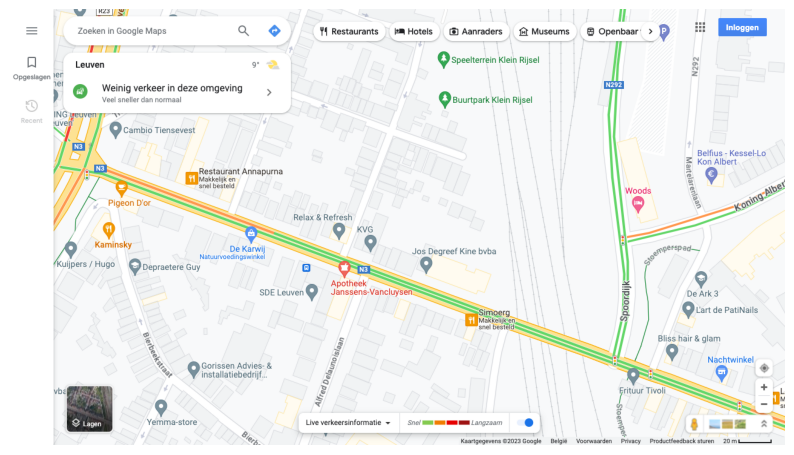

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(im);

In [6]:
def display_shot(url:  Union[str, os.PathLike]):
    if isinstance(url, str):
        image = Path(url)
    elif isinstance(url, os.PathLike):
        image = url
    else:
        raise TypeError("url must be a string or a path object")
    assert image.exists()
    im = cv2.cvtColor(cv2.imread(image.as_posix()), cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_axis_off()
    ax.imshow(im);
    return ax

In [7]:
# Open the TOML file
with open("config.toml", "r") as f:
    # Load the contents of the file into a dictionary
    config = toml.load(f)

# Print the values
print(config)

{'leuven': {'geldenaaksepoort': {'url': 'https://www.google.com/maps/@50.8726718,4.7131464,18z/data=!5m1!1e1'}, 'tiensevest': {'url': 'https://www.google.com/maps/@50.8747536,4.713817,17.97z/data=!5m1!1e1'}, 'tiensesteenweg': {'url': 'https://www.google.com/maps/@50.8733218,4.7172716,18z/data=!5m1!1e1', 'points': [[164, 268], [187, 276], [207, 283], [225, 290], [247, 299], [270, 307], [290, 315], [314, 324], [341, 334], [368, 344], [395, 354], [421, 364], [448, 374], [473, 383], [500, 394], [530, 405], [603, 432], [625, 441], [647, 449], [675, 458], [699, 467], [728, 478], [761, 490], [849, 522], [879, 534], [904, 543], [928, 552], [953, 561], [983, 572], [1028, 589], [1082, 607], [1123, 623], [1163, 638], [1194, 649]]}, 'tiensestraat': {'url': 'https://www.google.com/maps/@50.8748008,4.7106216,17z/data=!5m1!1e1'}}}


In [8]:
streets = list(config["leuven"].keys())
streets

['geldenaaksepoort', 'tiensevest', 'tiensesteenweg', 'tiensestraat']

In [9]:
mosaic = [
    [streets[3], streets[0]],
    [streets[1], streets[2]]
]

In [10]:
plt.rc('axes.spines', top=False, right=False)

In [11]:
URL_IMAGE_DIR = "shots"
url_image_dir = Path(URL_IMAGE_DIR)
assert url_image_dir.exists()
location = "leuven"

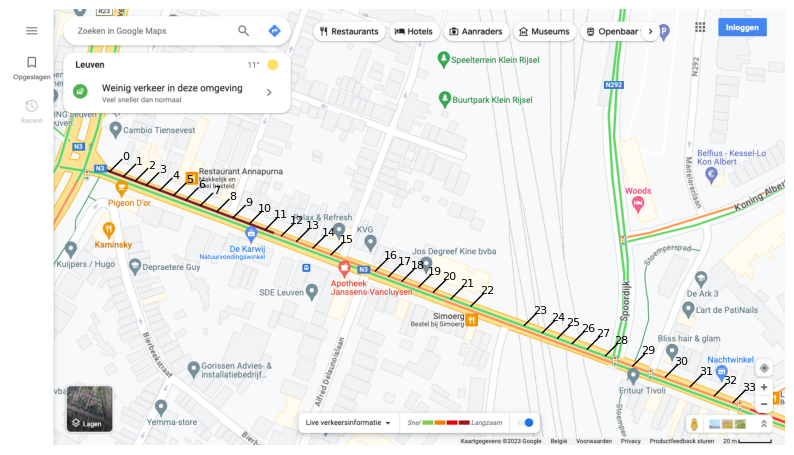

In [293]:
fig, ax = plt.subplots(figsize=(10, 10))
location = "leuven"
street = "tiensesteenweg"
img_url_path = next(url_image_dir.glob(f"{location}_{street}_*.png"))
im = cv2.cvtColor(cv2.imread(img_url_path.as_posix()), cv2.COLOR_BGR2RGB)
ax.spines[:].set_visible(False)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.imshow(im)
for i, p in enumerate(config[location][street]["points"]):
    x, y = p[0], p[1]
    x_end, y_end = x + street_offsets[street][0], y + street_offsets[street][1]
    ax.plot([x, x_end], [y, y_end], color="k", linewidth=1)
    ax.annotate(
        f"{i}",
        xy=(x_end, y_end),
        xytext=(x_end + street_offsets[street][2], y_end + street_offsets[street][3]),
        fontsize=8,
        ha=street_offsets[street][4],
        va=street_offsets[street][5],
    )
plt.savefig(
    "meetpunten_leuven_tiensesteenweg.png",  # Set path and filename
    dpi=300,  # Set dots per inch
    bbox_inches="tight",  # Remove extra whitespace around plot
    facecolor="white",
)  # Set background color to white

In [12]:
point_annots_defaults = {
    'xytext': (10, 10), 'textcoords': 'offset points', 
    # "xycoords": "data",
    'fontsize': 'x-small', 'ha': 'left', 'va': 'bottom', 
    'arrowprops': {
        'arrowstyle': '-', 'connectionstyle': 'angle', 'shrinkB': 0
    }
}

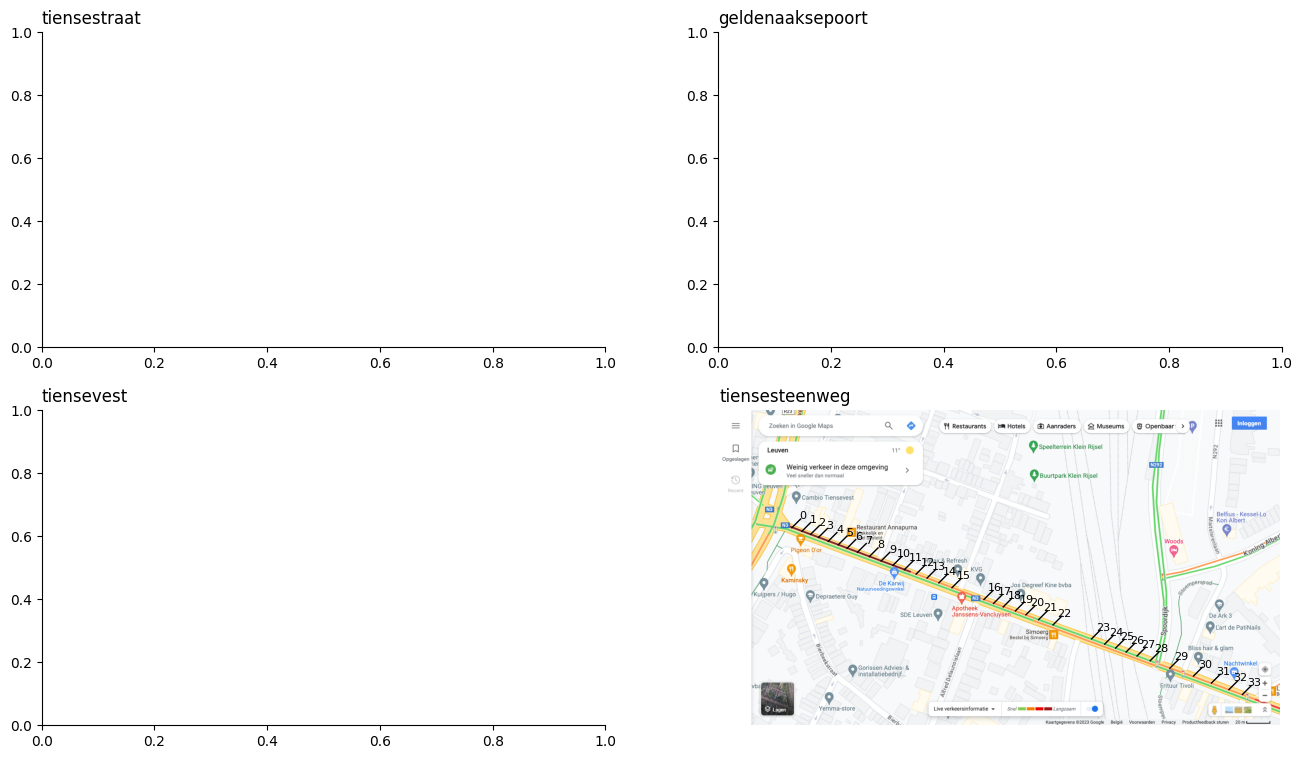

In [18]:
fig, axd = plt.subplot_mosaic(
    mosaic, gridspec_kw={"width_ratios": [1, 1], "wspace": 0.2}, figsize=(16, 9)
)

for title, ax in axd.items():
    ax.set_title(title, size="large", loc="left")

text_offset = 6
line_offset = 20

street_offsets = {"tiensestraat": [-line_offset, line_offset, -text_offset, text_offset, "center", "center"],
                  "tiensevest": [-line_offset, -line_offset, -text_offset, -text_offset, "center", "center"],
                  "geldenaaksepoort": [line_offset, line_offset, text_offset, text_offset, "center", "center"],
                  "tiensesteenweg": [line_offset, -line_offset, text_offset, -text_offset, "center", "center"]}

for street in streets:
    if street != "tiensesteenweg":
        continue
    img_url_path = next(url_image_dir.glob(f"{location}_{street}_*.png"))
    im = cv2.cvtColor(cv2.imread(img_url_path.as_posix()), cv2.COLOR_BGR2RGB)
    axd[street].spines[:].set_visible(False)
    axd[street].yaxis.set_visible(False)
    axd[street].xaxis.set_visible(False)
    axd[street].imshow(im)
    for i, p in enumerate(config[location][street]["points"]):
        x, y = p[0], p[1]
        x_end, y_end = x + street_offsets[street][0], y + street_offsets[street][1]
        axd[street].plot([x, x_end], [y, y_end], color="k", linewidth=1)
        axd[street].annotate(
            f"{i}",
            xy=(x_end, y_end),
            xytext=(x_end + street_offsets[street][2], y_end + street_offsets[street][3]),
            fontsize=8,
            ha=street_offsets[street][4],
            va=street_offsets[street][5],
        )

# display(fig)

In [20]:
max_points = 0
for location in config.keys():
    for street in config[location].keys():
        print (f"{location=} {street=}")
        if not "points" in config[location][street]:
            continue
        number_of_points = len(config[location][street]["points"])
        if number_of_points > max_points:
            max_points = number_of_points
            max_location = location
            max_street = street
print(f"Maximum number of measurement points is {max_points} in {max_street} in {location}")

location='leuven' street='geldenaaksepoort'
location='leuven' street='tiensevest'
location='leuven' street='tiensesteenweg'
location='leuven' street='tiensestraat'
Maximum number of measurement points is 34 in tiensesteenweg in leuven


# Walk over screenshots and sample pixel colors

In [58]:
rows = []
for location in config.keys():
    for street in config[location].keys():
        for p in url_image_dir.glob(f"{location}_{street}_*.png"):
            # print (p.stem)
            timestamp = datetime.strptime(p.stem, f"{location}_{street}_%Y%m%d-%H%M%S")
            if timestamp < datetime(2023, 10, 17, 15, 55, 0):
                # print(f"Skipped {p.stem}")
                continue
            print(timestamp)
            screenshot = cv2.cvtColor(cv2.imread(p.as_posix()), cv2.COLOR_BGR2RGB)
            colors = ()
            if not "points"in config[location][street]:
                continue
            for point in config[location][street]["points"]:
                color = screenshot[point[1], point[0]]
                print(color)
                colors += (color, color[0], color[1], color[2])
            row = (location, street, p, timestamp) + colors
            rows.append(row)

2023-10-17 17:41:19
2023-10-17 18:07:16
2023-10-17 16:13:04
2023-10-17 15:57:28
2023-10-17 17:25:46
2023-10-17 16:59:46
2023-10-17 16:28:39
2023-10-17 17:20:34
2023-10-17 16:07:52
2023-10-17 18:02:05
2023-10-17 17:10:10
2023-10-17 16:23:27
2023-10-17 16:02:40
2023-10-17 17:46:31
2023-10-17 17:36:08
2023-10-17 16:44:13
2023-10-17 17:56:54
2023-10-17 17:04:58
2023-10-17 16:18:16
2023-10-17 16:33:50
2023-10-17 16:39:01
2023-10-17 17:51:42
2023-10-17 17:30:57
2023-10-17 17:15:22
2023-10-17 16:54:35
2023-10-17 16:49:24
2023-10-17 16:44:16
2023-10-17 16:33:53
2023-10-17 18:02:08
2023-10-17 17:05:00
2023-10-17 17:56:56
2023-10-17 16:28:42
2023-10-17 16:39:04
2023-10-17 18:07:19
2023-10-17 16:49:27
2023-10-17 15:57:31
2023-10-17 17:25:49
2023-10-17 16:59:49
2023-10-17 17:15:25
2023-10-17 17:51:45
2023-10-17 17:31:00
2023-10-17 17:41:22
2023-10-17 17:20:37
2023-10-17 16:07:55
2023-10-17 16:54:38
2023-10-17 16:13:07
2023-10-17 17:10:13
2023-10-17 17:36:11
2023-10-17 16:23:30
2023-10-17 16:02:43


In [59]:
rows[0]

('leuven',
 'tiensesteenweg',
 PosixPath('shots/leuven_tiensesteenweg_20231017-170504.png'),
 datetime.datetime(2023, 10, 17, 17, 5, 4),
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([129,  31,  31], dtype=uint8),
 129,
 31,
 31,
 array([255, 151,  77], dtype=uint8),
 255,
 151,
 77,
 array([255, 151,  77], dtype=uint8),
 255,
 151,
 77,
 array([255, 151,  77], dtype=uint8),
 255,
 151,
 77,
 array([255, 151,  77], dtype=uint8),
 255,
 151,


In [60]:
all_columns = ["location", "street", "path", "timestamp"]
for i in range(max_points):
    all_columns.extend((f"color_{i}", f"p{i}_red", f"p{i}_green", f"p{i}_blue"))
all_columns

['location',
 'street',
 'path',
 'timestamp',
 'color_0',
 'p0_red',
 'p0_green',
 'p0_blue',
 'color_1',
 'p1_red',
 'p1_green',
 'p1_blue',
 'color_2',
 'p2_red',
 'p2_green',
 'p2_blue',
 'color_3',
 'p3_red',
 'p3_green',
 'p3_blue',
 'color_4',
 'p4_red',
 'p4_green',
 'p4_blue',
 'color_5',
 'p5_red',
 'p5_green',
 'p5_blue',
 'color_6',
 'p6_red',
 'p6_green',
 'p6_blue',
 'color_7',
 'p7_red',
 'p7_green',
 'p7_blue',
 'color_8',
 'p8_red',
 'p8_green',
 'p8_blue',
 'color_9',
 'p9_red',
 'p9_green',
 'p9_blue',
 'color_10',
 'p10_red',
 'p10_green',
 'p10_blue',
 'color_11',
 'p11_red',
 'p11_green',
 'p11_blue',
 'color_12',
 'p12_red',
 'p12_green',
 'p12_blue',
 'color_13',
 'p13_red',
 'p13_green',
 'p13_blue',
 'color_14',
 'p14_red',
 'p14_green',
 'p14_blue',
 'color_15',
 'p15_red',
 'p15_green',
 'p15_blue',
 'color_16',
 'p16_red',
 'p16_green',
 'p16_blue',
 'color_17',
 'p17_red',
 'p17_green',
 'p17_blue',
 'color_18',
 'p18_red',
 'p18_green',
 'p18_blue',
 'col

In [61]:
df = pd.DataFrame(rows, columns=all_columns).sort_values(by="timestamp")
df.head()

location          street                                             path  \
6    leuven  tiensesteenweg  shots/leuven_tiensesteenweg_20231017-155734.png   
17   leuven  tiensesteenweg  shots/leuven_tiensesteenweg_20231017-160247.png   
7    leuven  tiensesteenweg  shots/leuven_tiensesteenweg_20231017-160758.png   
9    leuven  tiensesteenweg  shots/leuven_tiensesteenweg_20231017-161310.png   
22   leuven  tiensesteenweg  shots/leuven_tiensesteenweg_20231017-161822.png   

             timestamp        color_0  p0_red  p0_green  p0_blue  \
6  2023-10-17 15:57:34  [129, 31, 31]     129        31       31   
17 2023-10-17 16:02:47  [129, 31, 31]     129        31       31   
7  2023-10-17 16:07:58  [129, 31, 31]     129        31       31   
9  2023-10-17 16:13:10  [129, 31, 31]     129        31       31   
22 2023-10-17 16:18:22  [129, 31, 31]     129        31       31   

          color_1  p1_red  ...  p31_green  p31_blue        color_32  p32_red  \
6   [129, 31, 31]     129  ...         60        50   [242, 60, 50]      242   
17  [129, 31, 31]     129  ...         60        50   [242, 60, 50]      242   
7   [129, 31, 31]     129  ...        151        77  [255, 151, 77]      255   
9   [129, 31, 31]     129  ...        151        77  [255, 151, 77]      255   
22  [129, 31, 31]     129  ...        214       104  [99, 214, 104]       99   

    p32_green  p32_blue        color_33  p33_red  p33_green  p33_blue  
6          60        50   [242, 60, 50]      242         60        50  
17         60        50   [242, 60, 50]      242         60        50  
7         151        77  [255, 151, 77]      255        151        77  
9         151        77  [255, 151, 77]      255        151        77  
22        214       104  [99, 214, 104]       99        214       104  

[5 rows x 140 columns]

In [62]:
df.tail()

location          street                                             path  \
18   leuven  tiensesteenweg  shots/leuven_tiensesteenweg_20231017-174637.png   
11   leuven  tiensesteenweg  shots/leuven_tiensesteenweg_20231017-175148.png   
23   leuven  tiensesteenweg  shots/leuven_tiensesteenweg_20231017-175659.png   
16   leuven  tiensesteenweg  shots/leuven_tiensesteenweg_20231017-180210.png   
4    leuven  tiensesteenweg  shots/leuven_tiensesteenweg_20231017-180722.png   

             timestamp        color_0  p0_red  p0_green  p0_blue  \
18 2023-10-17 17:46:37  [242, 60, 50]     242        60       50   
11 2023-10-17 17:51:48  [242, 60, 50]     242        60       50   
23 2023-10-17 17:56:59  [242, 60, 50]     242        60       50   
16 2023-10-17 18:02:10  [242, 60, 50]     242        60       50   
4  2023-10-17 18:07:22  [242, 60, 50]     242        60       50   

          color_1  p1_red  ...  p31_green  p31_blue        color_32  p32_red  \
18  [242, 60, 50]     242  ...        151        77  [255, 151, 77]      255   
11  [242, 60, 50]     242  ...         60        50   [242, 60, 50]      242   
23  [242, 60, 50]     242  ...        151        77  [255, 151, 77]      255   
16  [242, 60, 50]     242  ...        151        77  [255, 151, 77]      255   
4   [242, 60, 50]     242  ...        214       104  [99, 214, 104]       99   

    p32_green  p32_blue        color_33  p33_red  p33_green  p33_blue  
18        151        77  [255, 151, 77]      255        151        77  
11         60        50   [242, 60, 50]      242         60        50  
23        151        77  [255, 151, 77]      255        151        77  
16        151        77  [255, 151, 77]      255        151        77  
4         214       104  [99, 214, 104]       99        214       104  

[5 rows x 140 columns]

In [66]:
df["color_0"].astype(str).unique()

array(['[129  31  31]', '[242  60  50]', '[255 151  77]'], dtype=object)

In [67]:
df["color_0"].astype(str).value_counts()

color_0
[129  31  31]    14
[242  60  50]     7
[255 151  77]     5
Name: count, dtype: int64

242 60 50


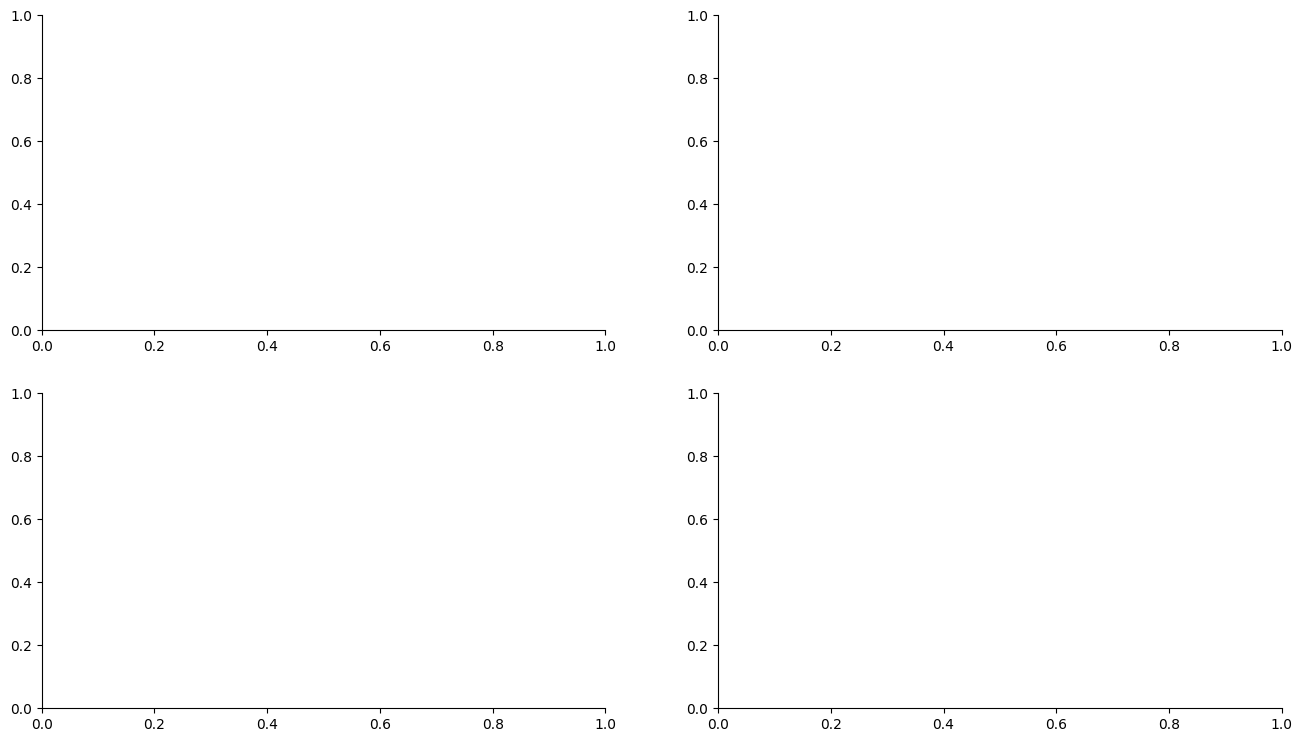

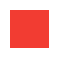

255 151 77


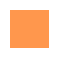

99 214 104


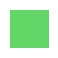

In [102]:
fig, axd = plt.subplot_mosaic(
    mosaic, gridspec_kw={"width_ratios": [1, 1], "wspace": 0.2}, figsize=(16, 9)
)
for color in df["color_29"].astype(str).unique():
    parts = " ".join(color.split()).split(" ")
    numbers = re.findall(r'\d+', color)
    print (numbers[0], numbers[1], numbers[2])
    r = int(numbers[0])
    g = int(numbers[1])
    b = int(numbers[2])
    fig, ax = plt.subplots(figsize=(0.5,0.5))
    ax.axis("off")
    ax.imshow([[(r, g, b)]])
    plt.show()

In [29]:
df[df["color_0"].astype(str) == "[253 226 147]"]

location          street                                             path  \
13   leuven  tiensesteenweg  shots/leuven_tiensesteenweg_20231017-123926.png   
29   leuven  tiensesteenweg  shots/leuven_tiensesteenweg_20231017-124438.png   

             timestamp          color_0  p0_red  p0_green  p0_blue  \
13 2023-10-17 12:39:26  [253, 226, 147]     253       226      147   
29 2023-10-17 12:44:38  [253, 226, 147]     253       226      147   

            color_1  p1_red  ...  p31_green  p31_blue        color_32  \
13  [253, 226, 147]     253  ...        214       104  [99, 214, 104]   
29  [253, 226, 147]     253  ...        214       104  [99, 214, 104]   

    p32_red  p32_green  p32_blue        color_33  p33_red  p33_green  p33_blue  
13       99        214       104  [99, 214, 104]       99        214       104  
29       99        214       104  [99, 214, 104]       99        214       104  

[2 rows x 140 columns]

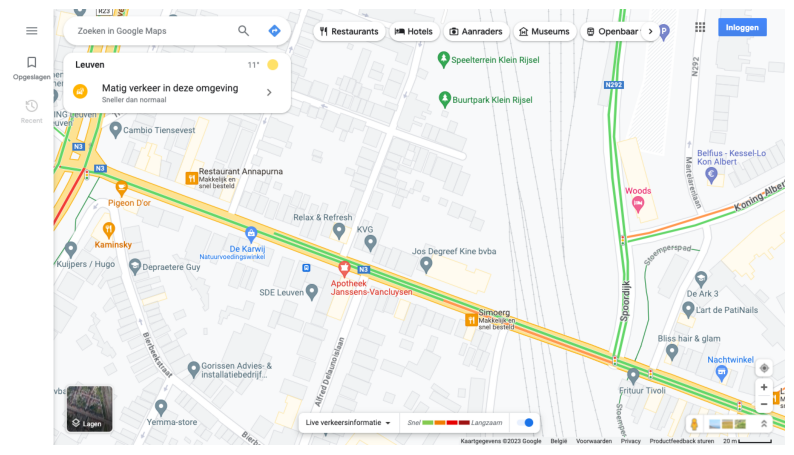

In [31]:
_ = display_shot("shots/leuven_tiensesteenweg_20231017-124438.png")

In [103]:
color_map = {
    "[129  31  31]": "darkred",
    "[242  60  50]": "red",
    "[255 151  77]": "orange",
    "[99 214 104]": "green"
 
}

In [104]:
for i in range(max_points):
    df[f"traffic_color_{i}"] = df[f"color_{i}"].astype(str).map(color_map)
df.sort_values(by="timestamp").head()

location          street                                             path  \
0   leuven  tiensesteenweg  shots/leuven_tiensesteenweg_20231017-155734.png   
1   leuven  tiensesteenweg  shots/leuven_tiensesteenweg_20231017-160247.png   
2   leuven  tiensesteenweg  shots/leuven_tiensesteenweg_20231017-160758.png   
3   leuven  tiensesteenweg  shots/leuven_tiensesteenweg_20231017-161310.png   
4   leuven  tiensesteenweg  shots/leuven_tiensesteenweg_20231017-161822.png   

            timestamp        color_0  p0_red  p0_green  p0_blue  \
0 2023-10-17 15:57:34  [129, 31, 31]     129        31       31   
1 2023-10-17 16:02:47  [129, 31, 31]     129        31       31   
2 2023-10-17 16:07:58  [129, 31, 31]     129        31       31   
3 2023-10-17 16:13:10  [129, 31, 31]     129        31       31   
4 2023-10-17 16:18:22  [129, 31, 31]     129        31       31   

         color_1  p1_red  ...  traffic_color_24  traffic_color_25  \
0  [129, 31, 31]     129  ...            orange            orange   
1  [129, 31, 31]     129  ...            orange            orange   
2  [129, 31, 31]     129  ...               NaN               NaN   
3  [129, 31, 31]     129  ...               NaN               NaN   
4  [129, 31, 31]     129  ...               NaN               NaN   

  traffic_color_26  traffic_color_27  traffic_color_28  traffic_color_29  \
0           orange            orange            orange               red   
1           orange            orange            orange               red   
2              NaN               NaN               NaN            orange   
3              NaN               NaN               NaN            orange   
4              NaN               NaN               NaN               NaN   

  traffic_color_30  traffic_color_31  traffic_color_32  traffic_color_33  
0              NaN               red               red               red  
1              NaN               red               red               red  
2              NaN            orange            orange            orange  
3              NaN            orange            orange            orange  
4              NaN               NaN               NaN               NaN  

[5 rows x 174 columns]

In [105]:
color_point = "color_20"
df[~df[color_point].astype(str).isin(color_map.keys())].groupby(df[color_point].astype(str)).size()

color_20
[ 99 214 104]    2
dtype: int64

In [106]:
wrong_color = "[243  80  71]"

In [47]:
for color in df[~df[color_point].astype(str).isin(color_map.keys())].groupby(df[color_point].astype(str)).size().index:
    if color=='None':
        continue
    print(f"{color=} {location=} {street=}")
    parts = " ".join(color.split()).split(" ")
    numbers = re.findall(r'\d+', color)
    print (numbers[0], numbers[1], numbers[2])
    r = int(numbers[0])
    g = int(numbers[1])
    b = int(numbers[2])
    plt.axis("off")
    plt.imshow([[(r, g, b)]])
    plt.show()

NameError: name 'color_point' is not defined

In [27]:
df[df[color_point].astype(str) == wrong_color]["path"].values[0]

PosixPath('shots/rotselaar_stationstraat_20230602-154321.png')

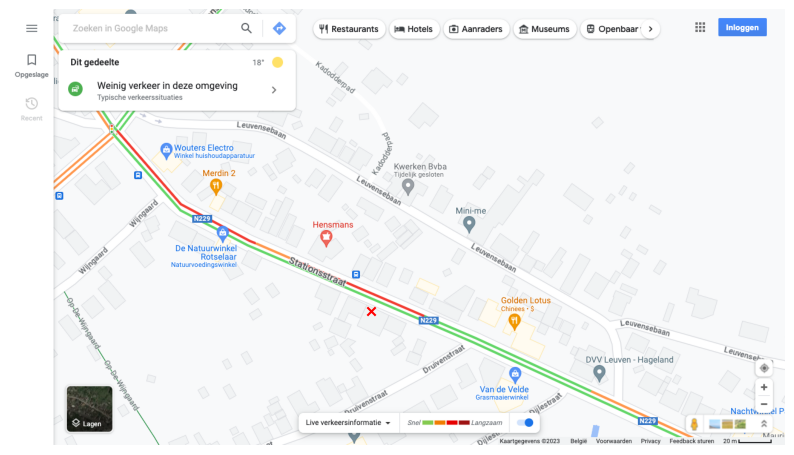

In [28]:
ax = display_shot(df[df[color_point].astype(str) == wrong_color]["path"].values[0])
point_coords = config[location]["rodenbachlaan"]["points"][6]
ax.scatter(point_coords[0], point_coords[1], marker="x", color="red");

In [29]:
df[df[color_point].astype(str) == wrong_color]["path"].values[0]

PosixPath('shots/rotselaar_stationstraat_20230602-154321.png')

In [48]:
def display_shot_region(url:  Union[str, os.PathLike], x:int, y:int, offset:int):
    if isinstance(url, str):
        image_url = Path(url)
    elif isinstance(url, os.PathLike):
        image_url = url
    else:
        raise TypeError("url must be a string or a path object")
    assert image_url.exists()
    im = cv2.cvtColor(cv2.imread(image_url.as_posix()), cv2.COLOR_BGR2RGB)
    # x, y, offset = point_coords[1], point_coords[0], 10
    xmin, xmax, ymin, ymax = x-offset, x+offset, y-offset, y+offset
    if xmax > im.shape[0]:
        xmax = im.shape[0]-1
    assert xmin >= 0
    assert xmax < im.shape[0]
    assert ymin >= 0
    assert ymax < im.shape[1]
    print (f"{xmin=}, {xmax=}, {ymin=}, {ymax=}")
    # xmin, xmax, ymin, ymax = 100, 110, 100, 110
    zoom = im[xmin:xmax, ymin:ymax, :]
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_axis_off()
    ax.imshow(zoom);
    return ax

In [31]:
df[df[color_point].astype(str) == wrong_color]["path"].values[0]

PosixPath('shots/rotselaar_stationstraat_20230602-154321.png')

xmin=398, xmax=598, ymin=495, ymax=695


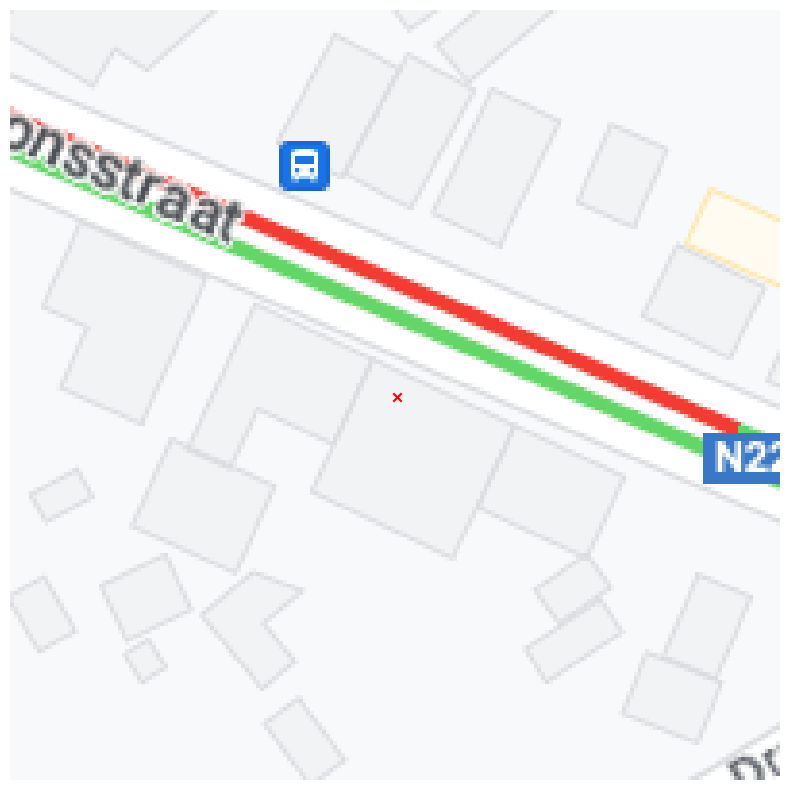

In [32]:
ax = display_shot_region(df[df[color_point].astype(str) == wrong_color]["path"].values[0], point_coords[1], point_coords[0], 100)
ax.scatter(100, 100, marker="x", color="red");

In [33]:
df[df[color_point].astype(str) == wrong_color][["street", "path"]]

street                                               path
265  stationstraat  shots/rotselaar_stationstraat_20230602-154321.png

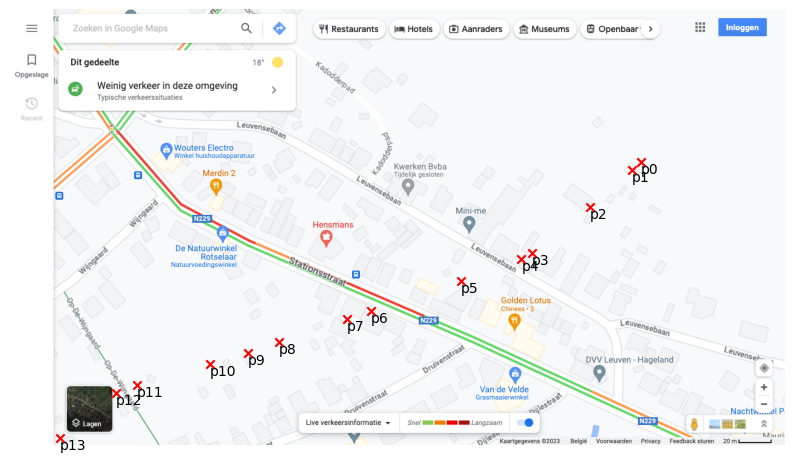

In [34]:
ax = display_shot(df[df[color_point].astype(str) == wrong_color]["path"].item())
for i, p in enumerate(config[location]["rodenbachlaan"]["points"]):
    ax.scatter(p[0], p[1], marker="x", color="red")
    ax.annotate(f"p{i}", (p[0], p[1]), horizontalalignment="left", verticalalignment="top")

In [35]:
point_coords

[595, 498]

In [107]:
df.filter(like='traffic_color', axis=1).isna().sum()

traffic_color_0      0
traffic_color_1      0
traffic_color_2      0
traffic_color_3      0
traffic_color_4      0
traffic_color_5      0
traffic_color_6      0
traffic_color_7      0
traffic_color_8      0
traffic_color_9      0
traffic_color_10     0
traffic_color_11     0
traffic_color_12     2
traffic_color_13     2
traffic_color_14     2
traffic_color_15     2
traffic_color_16     2
traffic_color_17     2
traffic_color_18     2
traffic_color_19     2
traffic_color_20     2
traffic_color_21    22
traffic_color_22    22
traffic_color_23    22
traffic_color_24    22
traffic_color_25    22
traffic_color_26    22
traffic_color_27    22
traffic_color_28    22
traffic_color_29     7
traffic_color_30    26
traffic_color_31     7
traffic_color_32     8
traffic_color_33     8
dtype: int64

# Analyse the data and make plot

In [116]:
df = df.sort_values(by="timestamp").reset_index(drop=True).copy()

In [296]:
df["street"].shape

(26,)

In [162]:
df_resampled = df.set_index("timestamp").resample("1Min").ffill()

In [158]:
all_color_indexes = [f"matplotlib_color_{i}_index" for i in range(13)]
all_color_indexes

['matplotlib_color_0_index',
 'matplotlib_color_1_index',
 'matplotlib_color_2_index',
 'matplotlib_color_3_index',
 'matplotlib_color_4_index',
 'matplotlib_color_5_index',
 'matplotlib_color_6_index',
 'matplotlib_color_7_index',
 'matplotlib_color_8_index',
 'matplotlib_color_9_index',
 'matplotlib_color_10_index',
 'matplotlib_color_11_index',
 'matplotlib_color_12_index']

In [111]:
for color in color_map.keys():
    print (color)

[129  31  31]
[242  60  50]
[255 151  77]
[99 214 104]


In [112]:
color_space = [[0.50588235, 0.12156863, 0.12156863],
       [0.38823529, 0.83921569, 0.40784314],
       [1.        , 0.59215686, 0.30196078],
       [0.94901961, 0.23529412, 0.19607843],
       [1.        , 1.        , 1.        ]]

In [75]:
matplot_lib_map = {'darkred': 0, 'green': 1, 'orange': 2, 'red': 3, 'white': 4}

In [159]:
for i in range(34):
    df_resampled[f"matplotlib_color_{i}_index"] = df_resampled[f"traffic_color_{i}"].map(matplot_lib_map)

In [164]:
df_resampled

location          street  \
timestamp                                      
2023-10-17 15:57:00      NaN             NaN   
2023-10-17 15:58:00   leuven  tiensesteenweg   
2023-10-17 15:59:00   leuven  tiensesteenweg   
2023-10-17 16:00:00   leuven  tiensesteenweg   
2023-10-17 16:01:00   leuven  tiensesteenweg   
...                      ...             ...   
2023-10-17 18:03:00   leuven  tiensesteenweg   
2023-10-17 18:04:00   leuven  tiensesteenweg   
2023-10-17 18:05:00   leuven  tiensesteenweg   
2023-10-17 18:06:00   leuven  tiensesteenweg   
2023-10-17 18:07:00   leuven  tiensesteenweg   

                                                                path  \
timestamp                                                              
2023-10-17 15:57:00                                              NaN   
2023-10-17 15:58:00  shots/leuven_tiensesteenweg_20231017-155734.png   
2023-10-17 15:59:00  shots/leuven_tiensesteenweg_20231017-155734.png   
2023-10-17 16:00:00  shots/leuven_tiensesteenweg_20231017-155734.png   
2023-10-17 16:01:00  shots/leuven_tiensesteenweg_20231017-155734.png   
...                                                              ...   
2023-10-17 18:03:00  shots/leuven_tiensesteenweg_20231017-180210.png   
2023-10-17 18:04:00  shots/leuven_tiensesteenweg_20231017-180210.png   
2023-10-17 18:05:00  shots/leuven_tiensesteenweg_20231017-180210.png   
2023-10-17 18:06:00  shots/leuven_tiensesteenweg_20231017-180210.png   
2023-10-17 18:07:00  shots/leuven_tiensesteenweg_20231017-180210.png   

                           color_0  p0_red  p0_green  p0_blue        color_1  \
timestamp                                                                      
2023-10-17 15:57:00            NaN     NaN       NaN      NaN            NaN   
2023-10-17 15:58:00  [129, 31, 31]   129.0      31.0     31.0  [129, 31, 31]   
2023-10-17 15:59:00  [129, 31, 31]   129.0      31.0     31.0  [129, 31, 31]   
2023-10-17 16:00:00  [129, 31, 31]   129.0      31.0     31.0  [129, 31, 31]   
2023-10-17 16:01:00  [129, 31, 31]   129.0      31.0     31.0  [129, 31, 31]   
...                            ...     ...       ...      ...            ...   
2023-10-17 18:03:00  [242, 60, 50]   242.0      60.0     50.0  [242, 60, 50]   
2023-10-17 18:04:00  [242, 60, 50]   242.0      60.0     50.0  [242, 60, 50]   
2023-10-17 18:05:00  [242, 60, 50]   242.0      60.0     50.0  [242, 60, 50]   
2023-10-17 18:06:00  [242, 60, 50]   242.0      60.0     50.0  [242, 60, 50]   
2023-10-17 18:07:00  [242, 60, 50]   242.0      60.0     50.0  [242, 60, 50]   

                     p1_red  p1_green  ...  traffic_color_24 traffic_color_25  \
timestamp                              ...                                      
2023-10-17 15:57:00     NaN       NaN  ...               NaN              NaN   
2023-10-17 15:58:00   129.0      31.0  ...            orange           orange   
2023-10-17 15:59:00   129.0      31.0  ...            orange           orange   
2023-10-17 16:00:00   129.0      31.0  ...            orange           orange   
2023-10-17 16:01:00   129.0      31.0  ...            orange           orange   
...                     ...       ...  ...               ...              ...   
2023-10-17 18:03:00   242.0      60.0  ...               NaN              NaN   
2023-10-17 18:04:00   242.0      60.0  ...               NaN              NaN   
2023-10-17 18:05:00   242.0      60.0  ...               NaN              NaN   
2023-10-17 18:06:00   242.0      60.0  ...               NaN              NaN   
2023-10-17 18:07:00   242.0      60.0  ...               NaN              NaN   

                     traffic_color_26  traffic_color_27  traffic_color_28  \
timestamp                                                                   
2023-10-17 15:57:00               NaN               NaN               NaN   
2023-10-17 15:58:00            orange            orange            orange   
2023-10-17 15:59:00            orange            orange

In [165]:
df_resampled = df_resampled.reset_index().iloc[3:].set_index("timestamp")
df_resampled.head()

location          street  \
timestamp                                      
2023-10-17 16:00:00   leuven  tiensesteenweg   
2023-10-17 16:01:00   leuven  tiensesteenweg   
2023-10-17 16:02:00   leuven  tiensesteenweg   
2023-10-17 16:03:00   leuven  tiensesteenweg   
2023-10-17 16:04:00   leuven  tiensesteenweg   

                                                                path  \
timestamp                                                              
2023-10-17 16:00:00  shots/leuven_tiensesteenweg_20231017-155734.png   
2023-10-17 16:01:00  shots/leuven_tiensesteenweg_20231017-155734.png   
2023-10-17 16:02:00  shots/leuven_tiensesteenweg_20231017-155734.png   
2023-10-17 16:03:00  shots/leuven_tiensesteenweg_20231017-160247.png   
2023-10-17 16:04:00  shots/leuven_tiensesteenweg_20231017-160247.png   

                           color_0  p0_red  p0_green  p0_blue        color_1  \
timestamp                                                                      
2023-10-17 16:00:00  [129, 31, 31]   129.0      31.0     31.0  [129, 31, 31]   
2023-10-17 16:01:00  [129, 31, 31]   129.0      31.0     31.0  [129, 31, 31]   
2023-10-17 16:02:00  [129, 31, 31]   129.0      31.0     31.0  [129, 31, 31]   
2023-10-17 16:03:00  [129, 31, 31]   129.0      31.0     31.0  [129, 31, 31]   
2023-10-17 16:04:00  [129, 31, 31]   129.0      31.0     31.0  [129, 31, 31]   

                     p1_red  p1_green  ...  traffic_color_24 traffic_color_25  \
timestamp                              ...                                      
2023-10-17 16:00:00   129.0      31.0  ...            orange           orange   
2023-10-17 16:01:00   129.0      31.0  ...            orange           orange   
2023-10-17 16:02:00   129.0      31.0  ...            orange           orange   
2023-10-17 16:03:00   129.0      31.0  ...            orange           orange   
2023-10-17 16:04:00   129.0      31.0  ...            orange           orange   

                     traffic_color_26  traffic_color_27  traffic_color_28  \
timestamp                                                                   
2023-10-17 16:00:00            orange            orange            orange   
2023-10-17 16:01:00            orange            orange            orange   
2023-10-17 16:02:00            orange            orange            orange   
2023-10-17 16:03:00            orange            orange            orange   
2023-10-17 16:04:00            orange            orange            orange   

                    traffic_color_29  traffic_color_30  traffic_color_31  \
timestamp                                                                  
2023-10-17 16:00:00              red               NaN               red   
2023-10-17 16:01:00              red               NaN               red   
2023-10-17 16:02:00              red               NaN               red   
2023-10-17 16:03:00              red               NaN               red   
2023-10-17 16:04:00              red               NaN               red   

                     traffic_color_32 traffic_color_33  
timestamp                                               
2023-10-17 16:00:00               red              red  
2023-10-17 16:01:00               red              red  
2023-10-17 16:02:00               red              red  
2023-10-17 16:03:00               red              red  
2023-10-17 16:04:00               red              red  

[5 rows x 173 columns]

In [166]:
df_street = df_resampled.query("(street == 'tiensesteenweg')")
# df_street= df_street[df_street.index > "2023-06-02 15:30:00"]

In [167]:
df_street

location          street  \
timestamp                                      
2023-10-17 16:00:00   leuven  tiensesteenweg   
2023-10-17 16:01:00   leuven  tiensesteenweg   
2023-10-17 16:02:00   leuven  tiensesteenweg   
2023-10-17 16:03:00   leuven  tiensesteenweg   
2023-10-17 16:04:00   leuven  tiensesteenweg   
...                      ...             ...   
2023-10-17 18:03:00   leuven  tiensesteenweg   
2023-10-17 18:04:00   leuven  tiensesteenweg   
2023-10-17 18:05:00   leuven  tiensesteenweg   
2023-10-17 18:06:00   leuven  tiensesteenweg   
2023-10-17 18:07:00   leuven  tiensesteenweg   

                                                                path  \
timestamp                                                              
2023-10-17 16:00:00  shots/leuven_tiensesteenweg_20231017-155734.png   
2023-10-17 16:01:00  shots/leuven_tiensesteenweg_20231017-155734.png   
2023-10-17 16:02:00  shots/leuven_tiensesteenweg_20231017-155734.png   
2023-10-17 16:03:00  shots/leuven_tiensesteenweg_20231017-160247.png   
2023-10-17 16:04:00  shots/leuven_tiensesteenweg_20231017-160247.png   
...                                                              ...   
2023-10-17 18:03:00  shots/leuven_tiensesteenweg_20231017-180210.png   
2023-10-17 18:04:00  shots/leuven_tiensesteenweg_20231017-180210.png   
2023-10-17 18:05:00  shots/leuven_tiensesteenweg_20231017-180210.png   
2023-10-17 18:06:00  shots/leuven_tiensesteenweg_20231017-180210.png   
2023-10-17 18:07:00  shots/leuven_tiensesteenweg_20231017-180210.png   

                           color_0  p0_red  p0_green  p0_blue        color_1  \
timestamp                                                                      
2023-10-17 16:00:00  [129, 31, 31]   129.0      31.0     31.0  [129, 31, 31]   
2023-10-17 16:01:00  [129, 31, 31]   129.0      31.0     31.0  [129, 31, 31]   
2023-10-17 16:02:00  [129, 31, 31]   129.0      31.0     31.0  [129, 31, 31]   
2023-10-17 16:03:00  [129, 31, 31]   129.0      31.0     31.0  [129, 31, 31]   
2023-10-17 16:04:00  [129, 31, 31]   129.0      31.0     31.0  [129, 31, 31]   
...                            ...     ...       ...      ...            ...   
2023-10-17 18:03:00  [242, 60, 50]   242.0      60.0     50.0  [242, 60, 50]   
2023-10-17 18:04:00  [242, 60, 50]   242.0      60.0     50.0  [242, 60, 50]   
2023-10-17 18:05:00  [242, 60, 50]   242.0      60.0     50.0  [242, 60, 50]   
2023-10-17 18:06:00  [242, 60, 50]   242.0      60.0     50.0  [242, 60, 50]   
2023-10-17 18:07:00  [242, 60, 50]   242.0      60.0     50.0  [242, 60, 50]   

                     p1_red  p1_green  ...  traffic_color_24 traffic_color_25  \
timestamp                              ...                                      
2023-10-17 16:00:00   129.0      31.0  ...            orange           orange   
2023-10-17 16:01:00   129.0      31.0  ...            orange           orange   
2023-10-17 16:02:00   129.0      31.0  ...            orange           orange   
2023-10-17 16:03:00   129.0      31.0  ...            orange           orange   
2023-10-17 16:04:00   129.0      31.0  ...            orange           orange   
...                     ...       ...  ...               ...              ...   
2023-10-17 18:03:00   242.0      60.0  ...               NaN              NaN   
2023-10-17 18:04:00   242.0      60.0  ...               NaN              NaN   
2023-10-17 18:05:00   242.0      60.0  ...               NaN              NaN   
2023-10-17 18:06:00   242.0      60.0  ...               NaN              NaN   
2023-10-17 18:07:00   242.0      60.0  ...               NaN              NaN   

                     traffic_color_26  traffic_color_27  traffic_color_28  \
timestamp                                                                   
2023-10-17 16:00:00            orange            orange            orange   
2023-10-17 16:01:00            orange            orange            orange   
2023-10-17 16:02:00            orange            orange

In [168]:
",".join(df_street.columns)

'location,street,path,color_0,p0_red,p0_green,p0_blue,color_1,p1_red,p1_green,p1_blue,color_2,p2_red,p2_green,p2_blue,color_3,p3_red,p3_green,p3_blue,color_4,p4_red,p4_green,p4_blue,color_5,p5_red,p5_green,p5_blue,color_6,p6_red,p6_green,p6_blue,color_7,p7_red,p7_green,p7_blue,color_8,p8_red,p8_green,p8_blue,color_9,p9_red,p9_green,p9_blue,color_10,p10_red,p10_green,p10_blue,color_11,p11_red,p11_green,p11_blue,color_12,p12_red,p12_green,p12_blue,color_13,p13_red,p13_green,p13_blue,color_14,p14_red,p14_green,p14_blue,color_15,p15_red,p15_green,p15_blue,color_16,p16_red,p16_green,p16_blue,color_17,p17_red,p17_green,p17_blue,color_18,p18_red,p18_green,p18_blue,color_19,p19_red,p19_green,p19_blue,color_20,p20_red,p20_green,p20_blue,color_21,p21_red,p21_green,p21_blue,color_22,p22_red,p22_green,p22_blue,color_23,p23_red,p23_green,p23_blue,color_24,p24_red,p24_green,p24_blue,color_25,p25_red,p25_green,p25_blue,color_26,p26_red,p26_green,p26_blue,color_27,p27_red,p27_green,p27_blue,color_28,p

In [169]:
print_map = {"darkred":"*", "red":"x", "orange": "-"}

In [170]:
print_map.get(row[f'traffic_color_{0}'])

'x'

In [171]:
df_street["traffic_color_29"].unique()

array(['red', 'orange', nan], dtype=object)

In [251]:
for idx, row in df_street.iterrows():
    print(idx, end="")
    for i in range(34):
        symbol = print_map.get(row[f'traffic_color_{i}'], ".")
        print(symbol,  end="")
    print("\n")


2023-10-17 16:00:00************xxxxxxxxx--------x.xxx

2023-10-17 16:01:00************xxxxxxxxx--------x.xxx

2023-10-17 16:02:00************xxxxxxxxx--------x.xxx

2023-10-17 16:03:00************xxxxxxxxx--------x.xxx

2023-10-17 16:04:00************xxxxxxxxx--------x.xxx

2023-10-17 16:05:00************xxxxxxxxx--------x.xxx

2023-10-17 16:06:00************xxxxxxxxx--------x.xxx

2023-10-17 16:07:00************xxxxxxxxx--------x.xxx

2023-10-17 16:08:00************xxxxxxxxx........-.---

2023-10-17 16:09:00************xxxxxxxxx........-.---

2023-10-17 16:10:00************xxxxxxxxx........-.---

2023-10-17 16:11:00************xxxxxxxxx........-.---

2023-10-17 16:12:00************xxxxxxxxx........-.---

2023-10-17 16:13:00************xxxxxxxxx........-.---

2023-10-17 16:14:00************---------........-.---

2023-10-17 16:15:00************---------........-.---

2023-10-17 16:16:00************---------........-.---

2023-10-17 16:17:00************---------........-.---

2023-10-17

In [196]:
def print_colored_block(color_code, text):
   print(f"\033[{color_code}m{text}\033[0m", end="")

In [200]:
def print_colored_block(color_code, text):
   print(f"\u001b[{color_code}m{text}\x1b[0m", end="")

In [202]:
print_colored_block(90, "\u2588")

█

In [177]:
df_street["traffic_color_19"].unique()

array(['red', 'orange', nan], dtype=object)

In [175]:
ascii_color_map = {"darkred": 30,
                   "red": 31,
                   "orange": 32,
                   "green": 33}

In [252]:
for idx, row in df_street.iterrows():
    print("\n", idx, " ",end="")
    for i in range(34):
        ascii_color = ascii_color_map.get(row[f'traffic_color_{i}'], ".")
        print_colored_block(ascii_color, "\u2588")


 2023-10-17 16:00:00  ██████████████████████████████[.m████
 2023-10-17 16:01:00  ██████████████████████████████[.m████
 2023-10-17 16:02:00  ██████████████████████████████[.m████
 2023-10-17 16:03:00  ██████████████████████████████[.m████
 2023-10-17 16:04:00  ██████████████████████████████[.m████
 2023-10-17 16:05:00  ██████████████████████████████[.m████
 2023-10-17 16:06:00  ██████████████████████████████[.m████
 2023-10-17 16:07:00  ██████████████████████████████[.m████
 2023-10-17 16:08:00  █████████████████████[.m█[.m█[.m█[.m█[.m█[.m█[.m█[.m██[.m████
 2023-10-17 16:09:00  █████████████████████[.m█[.m█[.m█[.m█[.m█[.m█[.m█[.m██[.m████
 2023-10-17 16:10:00  █████████████████████[.m█[.m█[.m█[.m█[.m█[.m█[.m█[.m██[.m████
 2023-10-17 16:11:00  █████████████████████[.m█[.m█[.m█[.m█[.m█[.m█[.m█[.m██[.m████
 2023-10-17 16:12:00  █████████████████████[.m█[.m█[.m█[.m█[.m█[.m█[.m█[.m██[.m████
 2023-10-17 16:13:00  █████████████████████[.

# matplotlib

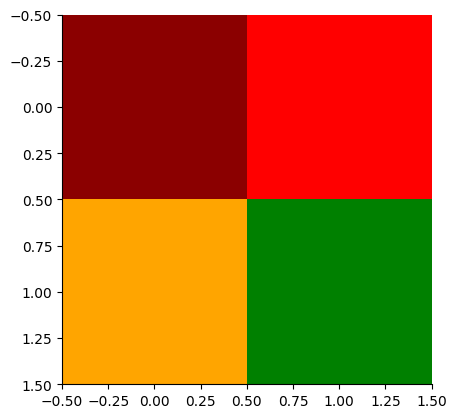

In [205]:
from matplotlib.colors import LinearSegmentedColormap

colors = ["darkred", "red", "orange", "green"]
cmap = LinearSegmentedColormap.from_list("my_cmap", colors)

plt.imshow([[0, 1], [2,3]], cmap=cmap)
plt.show()

In [215]:
df_street.shape

(128, 205)

In [253]:
color_columns = [f"traffic_color_{i}" for i in range(34)]
color2index ={"darkred":0, "red":1, "orange":2, "green":3}
index_columns= []
for idx, colom in enumerate(color_columns):
    df_street[f"index_color_{idx}"] = df_street[colom].map(color2index)
    index_columns.append(f"index_color_{idx}")
traffic_color_matrix = df_street[index_columns].fillna(3).to_numpy()
traffic_color_matrix

/var/folders/l3/cl401yld1x3f35c0g3sbm3b80000gp/T/ipykernel_93407/407041901.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_street[f"index_color_{idx}"] = df_street[colom].map(color2index)
/var/folders/l3/cl401yld1x3f35c0g3sbm3b80000gp/T/ipykernel_93407/407041901.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_street[f"index_color_{idx}"] = df_street[colom].map(color2index)


array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.]])

In [273]:
from matplotlib.text import Text

/var/folders/l3/cl401yld1x3f35c0g3sbm3b80000gp/T/ipykernel_93407/43538598.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ylabels);
/var/folders/l3/cl401yld1x3f35c0g3sbm3b80000gp/T/ipykernel_93407/43538598.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xlabels);


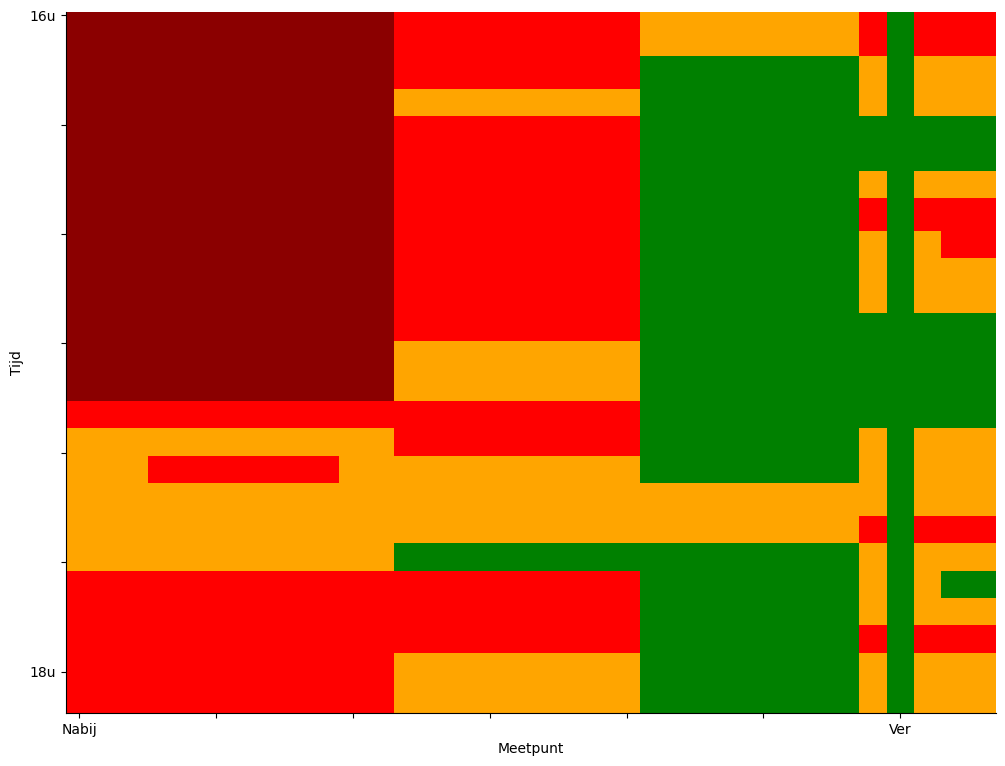

In [291]:
fig, ax = plt.subplots(figsize=(12, 12))
# plt.figure().set_figheight(1)
# plt.figure().set_figwidth(10)
plt.imshow(traffic_color_matrix, cmap=cmap, aspect=0.2);
# plt.axis('off');
ax.set_xlabel("Meetpunt")
ax.set_ylabel("Tijd");
# ax.set_xticks([]);
# ax.set_yticks([]);
ylabels = ax.get_yticklabels()
for idx, label in enumerate(ylabels):
    ylabels[idx].set_text('')
    if idx == 1:
        ylabels[1].set_text('16u')
    if idx == len(ylabels)-2:
        ylabels[-2].set_text('18u')
ax.set_yticklabels(ylabels);
xlabels = ax.get_xticklabels()
for idx, label in enumerate(xlabels):
    xlabels[idx].set_text('')
    if idx == 1:
        xlabels[1].set_text('Nabij')
    if idx == len(ylabels)-1:
        xlabels[-2].set_text('Ver')
ax.set_xticklabels(xlabels);

plt.savefig(
    "leuven_tiensesteenweg_231017_16u_18u.png",  # Set path and filename
    dpi=300,  # Set dots per inch
    bbox_inches="tight",  # Remove extra whitespace around plot
    facecolor="white",
)  # Set background color to white


In [281]:
ylabels

[Text(0, -20.0, '16u'),
 Text(0, 0.0, '0'),
 Text(0, 20.0, '20'),
 Text(0, 40.0, '40'),
 Text(0, 60.0, '60'),
 Text(0, 80.0, '80'),
 Text(0, 100.0, '100'),
 Text(0, 120.0, '120'),
 Text(0, 140.0, '18u')]

In [ ]:
len(index_columns)

In [219]:
df_street.shape[0]

128

In [220]:
resized_traffic_color_matrix = np.resize(traffic_color_matrix, ( 10*df_street.shape[0], 10*len(index_columns),))

In [222]:
resized_traffic_color_matrix[:20, :20]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2.,
        2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2.,
        2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.

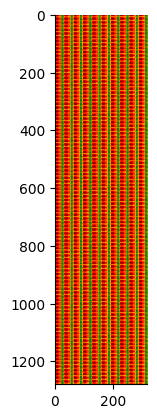

In [221]:
plt.imshow(resized_traffic_color_matrix, cmap=cmap);

In [80]:
df_resampled[all_color_indexes].T.values

array([[nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  3.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,
         3.],
       [nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  3.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,
         3.],
       [nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  3.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,
         3.],
       [nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  3.,  2.,  3.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,
         3.],
       [nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  3.,  2.,  3.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,
         3.],
       [nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  3.,  2.,  3.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,
         3.],
       [nan,  0.,  0.,  0.,  0.,  0.,  0

In [81]:
df_street.shape

(26, 207)

NameError: name 'labels' is not defined

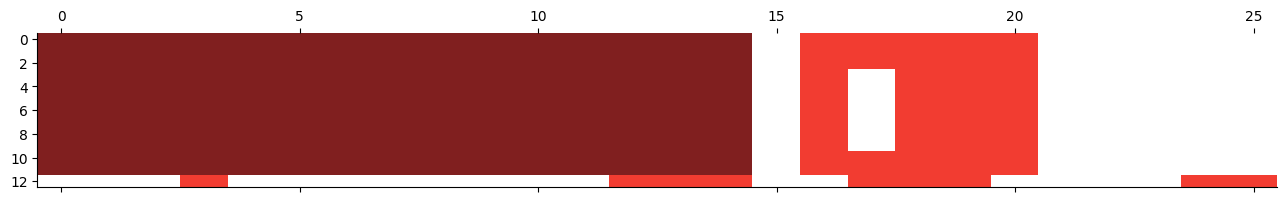

In [82]:
from matplotlib import colors
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

traffic_colorspace = colors.ListedColormap(color_space)

fig, ax = plt.subplots(figsize = (16,2))
ax.matshow(df_street[all_color_indexes].T.values, cmap=traffic_colorspace, aspect="auto");
# ax.xaxis.set_major_locator(ticker.FixedLocator([t for t in range(77)]))
# labels = df_street.index.strftime("%d\n%H").values.copy()

sparse_labels = [labels[0]]
for l1, l2 in zip(labels[:-1], labels[1:]):
    label = f"Mei {l2}" if l1[:2] != l2[:2] else l2[3:]
    sparse_labels.append(label)
sparse_labels[0] = "June 6\n15"
# sparse_labels.append(int(sparse_labels[-1])+1)
# ax.xaxis.set_major_formatter(ticker.FixedFormatter(sparse_labels))
ax.grid(axis = "y")
ax.set_axisbelow(False)

In [ ]:
df_resampled.tail()

location         street  \
timestamp                                       
2023-06-02 21:50:00  rotselaar  provinciebaan   
2023-06-02 21:55:00  rotselaar  provinciebaan   
2023-06-02 22:00:00  rotselaar  provinciebaan   
2023-06-02 22:05:00  rotselaar  provinciebaan   
2023-06-02 22:10:00  rotselaar  provinciebaan   

                                                                  path  \
timestamp                                                                
2023-06-02 21:50:00  shots/rotselaar_provinciebaan_20230602-214625.png   
2023-06-02 21:55:00  shots/rotselaar_provinciebaan_20230602-215136.png   
2023-06-02 22:00:00  shots/rotselaar_provinciebaan_20230602-215646.png   
2023-06-02 22:05:00  shots/rotselaar_provinciebaan_20230602-220157.png   
2023-06-02 22:10:00  shots/rotselaar_provinciebaan_20230602-220708.png   

                             color_0  p0_red  p0_green  p0_blue  \
timestamp                                                         
2023-06-02 21:50:00  [255, 255, 255]   255.0     255.0    255.0   
2023-06-02 21:55:00  [255, 255, 255]   255.0     255.0    255.0   
2023-06-02 22:00:00  [255, 255, 255]   255.0     255.0    255.0   
2023-06-02 22:05:00  [255, 255, 255]   255.0     255.0    255.0   
2023-06-02 22:10:00  [255, 255, 255]   255.0     255.0    255.0   

                             color_1  p1_red  p1_green  ...  \
timestamp                                               ...   
2023-06-02 21:50:00  [255, 255, 255]   255.0     255.0  ...   
2023-06-02 21:55:00  [255, 255, 255]   255.0     255.0  ...   
2023-06-02 22:00:00  [255, 255, 255]   255.0     255.0  ...   
2023-06-02 22:05:00  [255, 255, 255]   255.0     255.0  ...   
2023-06-02 22:10:00  [255, 255, 255]   255.0     255.0  ...   

                     matplotlib_color_32_index matplotlib_color_33_index  \
timestamp                                                                  
2023-06-02 21:50:00                          4                         4   
2023-06-02 21:55:00                          4                         4   
2023-06-02 22:00:00                          4                         4   
2023-06-02 22:05:00                          4                         4   
2023-06-02 22:10:00                          4                         4   

                     matplotlib_color_34_index  matplotlib_color_35_index  \
timestamp                                                                   
2023-06-02 21:50:00                          4                          4   
2023-06-02 21:55:00                          4                          4   
2023-06-02 22:00:00                          4                          4   
2023-06-02 22:05:00                          4                          4   
2023-06-02 22:10:00                          4                          4   

                     matplotlib_color_36_index matplotlib_color_37_index  \
timestamp                                                                  
2023-06-02 21:50:00                        NaN                       NaN   
2023-06-02 21:55:00                        NaN                       NaN   
2023-06-02 22:00:00                        NaN                       NaN   
2023-06-02 22:05:00                        NaN                       NaN   
2023-06-02 22:10:00                        NaN                       NaN   

                     matplotlib_color_38_index  matplotlib_color_39_index  \
timestamp                                                                   
2023-06-02 21:50:00                        NaN                        NaN   
2023-06-02 21:55:00                        NaN                        NaN   
2023-06-02 22:00:00                        NaN                        NaN   
2023-06-02 22:05:00                        NaN                        NaN   
2023-06-02 22:10:00                        NaN                        NaN   

                     matplotlib_color_40_index matplotlib_color_41_index  
timestamp                 

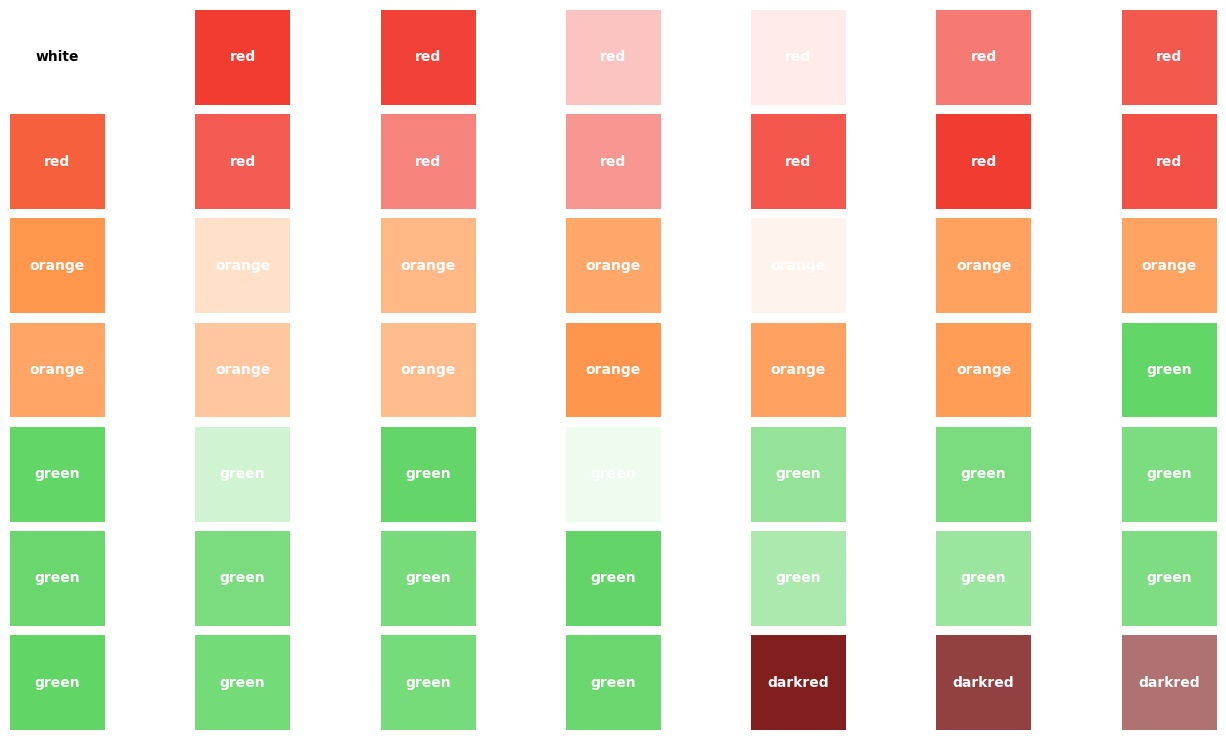

In [99]:
n_colors = len(color_map)
n_cols = int(np.round(np.sqrt(n_colors), 0))
n_rows = n_colors//n_cols
# fig, axd = plt.subplot_mosaic(
#     mosaic, gridspec_kw={"width_ratios": [1,]*n_cols, "wspace": 1/n_cols}, figsize=(16, 9)
# )
fig, axes = plt.subplots(n_cols, n_rows, figsize=(16,9))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
for ax, (color, color_name) in zip(axes.flat, color_map.items()):
    parts = " ".join(color.split()).split(" ")
    numbers = re.findall(r'\d+', color)
    # print (numbers[0], numbers[1], numbers[2], color_name)
    r = int(numbers[0])
    g = int(numbers[1])
    b = int(numbers[2])
    # fig, ax = plt.subplots(figsize=(0.5,0.5))

    ax.axis("off")
    ax.imshow([[(r, g, b)]])
    color = "k" if color_name == "white" else "white"
    ax.text(
        s=color_name,
        x=0,
        y=0,
        ha='center',
        va='center',
        color=color,
        fontdict={"fontweight":"bold"}
        # path_effects=[
        #     Stroke(foreground='black', linewidth=1), Normal()
        # ]
    )
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.show()


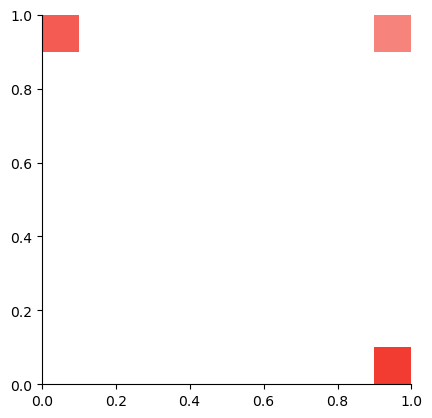

In [85]:
from matplotlib.patches import Rectangle

w = h = 0.2
row, col = 0, 0
fig, ax = plt.subplots()
for color, color_name in color_map.items():
    parts = " ".join(color.split()).split(" ")
    numbers = re.findall(r'\d+', color)
    # print (numbers[0], numbers[1], numbers[2])
    r = int(numbers[0])
    g = int(numbers[1])
    b = int(numbers[2])
    mpl_color = np.array([r/255, g/255, b/255])
    p = Rectangle((col-h/2, row-w/2), w, h, fc=mpl_color)
    ax.add_artist(p)
    col += 1
    if col > n_cols:
        row += 1
        col = 0
ax.set_aspect("equal")

In [83]:
n_cols

7